In [136]:
import vcr
import matplotlib.pyplot as plt
import pandas as pdy
import json
import requests
import datetime
from IPython.display import display, JSON

import tasking_manager_client as tm

print(tm.DEFAULT_INSTANCE_API)


def contirbutions(project_id, instance=tm.DEFAULT_INSTANCE_API):
    r = requests.get(
      f'https://{instance}/api/v2/projects/{project_id}/contributions/queries/day',
      headers = {
        'Acccept-Language': '*',
        'Content-Type': 'application/json'
      }
    )
    assert r.status_code == 200
#     display(JSON(r.json()))
    return r.json()

projects = """5909
7372
7379
7719
7720
7721
7768
7769
7770
7968
7969
7970
7971
7972
8047
8048
8049
8159
8188
8189
8190
8191
8192
8193
8194
8195
8196
8199
8200
8212
8213
8214
8216
8217
8218
8219
8232
8247
8248
8249
8250
8251
8254
8255
8262
8268
8269
8270""".split("\n")


def get_projects(projects):

    for project_id in projects:

        contr = contirbutions(project_id)
        contr = pd.DataFrame(contr['stats'])
        contr.date = pd.to_datetime(contr.date)
        contr['age'] = contr.date - contr.date[0]
        contr.age = contr.age.apply(lambda age_td: age_td.days)
        yield contr

stats = []
with vcr.use_cassette('test.yml', record_mode='new_episodes'):
    stats = list(get_projects(projects))

tasking-manager-tm4-production-api.hotosm.org


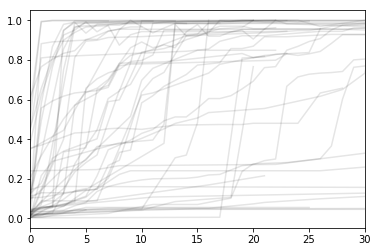

In [142]:
plt.figure()
plt.xlim([0,30])
for df in stats:
  plt.plot(df.age, df.cumulative_mapped/df.total_tasks, color='black', alpha=0.1)
  
plt.show()

In [ ]:
https://tasking-manager-tm4-production-api.hotosm.org/api/v2/projects/8469/contributions/queries/day/